<a href="https://colab.research.google.com/github/youngwoo28/2024-2_DeepLearning/blob/main/3week/5%EC%88%98_%EB%8F%99%EC%96%91%EB%AF%B8%EB%9E%98%EB%8C%80%ED%95%99%EA%B5%90_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%86%8C%ED%94%84%ED%8A%B8%EC%9B%A8%EC%96%B4%EA%B3%BC_20210829_%EC%B5%9C%EC%98%81%EC%9A%B0_3%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_SVM(New_%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Iris 데이터셋 불러오기
iris = datasets.load_iris()
X = iris.data[:, :2]  # 특성(꽃잎 길이, 꽃잎 폭)만 사용
y = iris.target


In [ ]:

# 클래스 4개로 확장하기 위해 임의로 새로운 클래스를 추가
# 3번째 클래스 (클래스 2)의 일부 데이터를 복사해서 새로운 클래스로 사용
new_class_indices = np.where(y == 2)[0]
y[new_class_indices[:10]] = 3  # 클래스 2 일부를 3으로 변경 (새 클래스)


In [ ]:
# 데이터셋을 학습용/테스트용으로 나누기 (70% 학습, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# RandomForestClassifier 모델 사용
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)



In [ ]:
# 성능 측정
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.57      0.62      0.59        13
           2       0.55      0.55      0.55        11
           3       0.00      0.00      0.00         2

    accuracy                           0.73        45
   macro avg       0.53      0.54      0.53        45
weighted avg       0.72      0.73      0.73        45



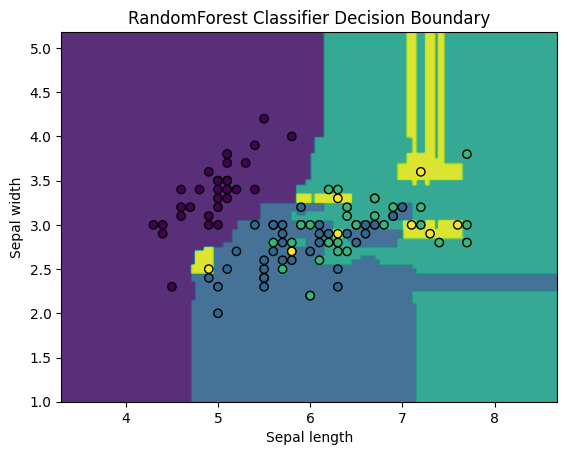

In [ ]:
# 결정 경계 시각화를 위한 함수 정의
def plot_decision_boundary(X, y, model):
    h = 0.02  # 결정 경계 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.9)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('RandomForest Classifier Decision Boundary')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)

###코드 설명:
클래스 확장:
기존의 Iris 데이터셋에는 3개의 클래스(0, 1, 2)가 존재합니다. 이를 4개로 확장하기 위해 임의로 클래스 2의 일부 데이터를 클래스 3으로 변경했습니다.

모델 변경:
SVM 대신 RandomForestClassifier를 사용하여 분류 작업을 수행합니다. RandomForest는 여러 개의 의사결정나무를 사용해 데이터를 분류하는 앙상블 학습 방법입니다.

성능 측정:
테스트 데이터셋을 사용하여 모델의 예측 정확도 및 분류 성능을 확인하고, classification_report로 Precision, Recall, F1-score 등을 출력합니다.

결정 경계 시각화:
2차원 데이터에 대한 결정 경계를 시각화하여, RandomForest 분류기의 예측 경계를 보여줍니다.

실행 결과:
성능 지표로 분류 정확도와 Precision, Recall, F1-score가 출력됩니다.
4개의 클래스로 확장된 데이터를 기반으로, 결정 경계가 시각화됩니다.
이 코드를 실행하면 3개의 클래스가 4개로 확장되고, RandomForestClassifier로 분류된 결과를 확인할 수 있습니다.

###      SVM vs RandomForest 비교 요약
          특징	           SVM	                       RandomForestClassifier
        데이터 크기	    소규모/중간 크기 데이터에 적합	       대규모 데이터셋에서도 잘 작동
        고차원 데이터         잘 처리 가능	                      다소 복잡할 수 있음
          훈련 속도	         느림	                               빠름
        과적합 방지	  적절한 매개변수 설정 시 방지 가능 	   자체적으로 과적합 방지 (앙상블 기법)
      결정 경계의 해석	해석이 어렵고, 직관적이지 않음	      변수 중요도를 통해 해석 가능
      비선형 데이터 처리  비선형 데이터를 다루기 위한 커널 필요   	비선형 데이터 처리에 효과적
        매개변수 튜닝	    복잡 (커널, C, 감마 등)	        상대적으로 간단 (트리 개수, 깊이 등)